# Visualize data

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pathlib import Path
from collections import defaultdict

In [2]:
data_dir = "malaria_data/cell_images"
parasitized_dir = os.path.join(data_dir, 'Parasitized')
uninfected_dir = os.path.join(data_dir, 'Uninfected')

parasitized_files = list(Path(parasitized_dir).glob('*.png'))
uninfected_files = list(Path(uninfected_dir).glob('*.png'))

print(f"Parasitized Images: {len(parasitized_files)}")
print(f"Uninfected Images: {len(uninfected_files)}")

Parasitized Images: 13779
Uninfected Images: 13779


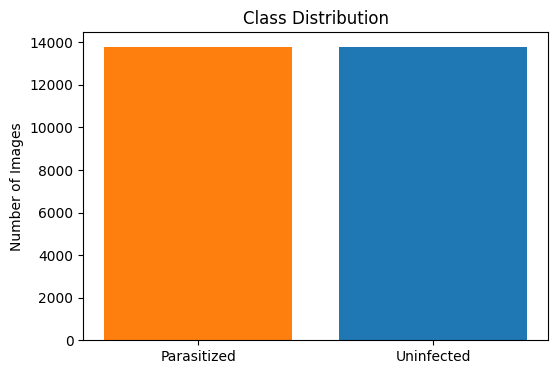

In [3]:
labels = ['Parasitized', 'Uninfected']
counts = [len(parasitized_files), len(uninfected_files)]

plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['#ff7f0e', '#1f77b4'])
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.show()

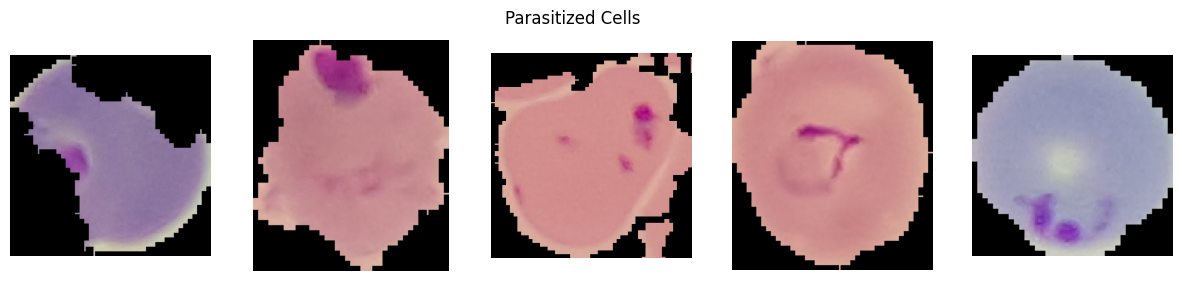

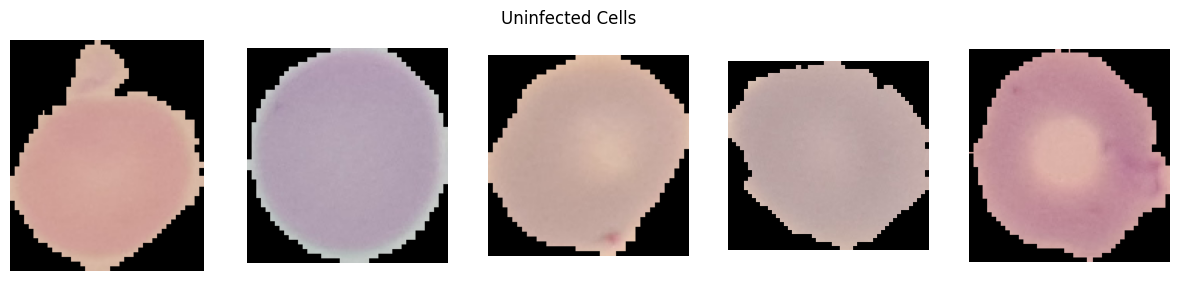

In [4]:
def plot_samples(image_files, title, num_samples=5):
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        img = cv2.imread(str(image_files[i]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

plot_samples(parasitized_files, "Parasitized Cells")
plot_samples(uninfected_files, "Uninfected Cells")

In [5]:
def get_image_sizes(file_list):
    sizes = []
    for f in file_list:
        img = cv2.imread(str(f))
        sizes.append(img.shape[:2])  # height, width
    return sizes

parasitized_sizes = get_image_sizes(parasitized_files)
uninfected_sizes = get_image_sizes(uninfected_files)

all_sizes = parasitized_sizes + uninfected_sizes
unique_sizes = set(all_sizes)

print("Unique image sizes found:")
print(unique_sizes)

Unique image sizes found:
{(166, 181), (226, 232), (70, 64), (124, 184), (130, 115), (88, 118), (202, 103), (139, 163), (205, 145), (163, 148), (121, 151), (172, 196), (79, 154), (193, 139), (196, 181), (94, 133), (154, 184), (193, 175), (112, 187), (157, 109), (127, 166), (187, 217), (79, 46), (190, 142), (109, 154), (223, 139), (148, 145), (160, 199), (142, 187), (181, 178), (145, 112), (103, 115), (175, 220), (160, 91), (220, 142), (118, 94), (178, 145), (115, 205), (76, 97), (289, 241), (136, 148), (100, 82), (151, 127), (169, 181), (175, 112), (73, 64), (133, 115), (130, 226), (91, 118), (106, 97), (166, 148), (124, 151), (88, 85), (139, 130), (205, 112), (97, 133), (157, 184), (163, 115), (121, 118), (172, 163), (97, 169), (190, 217), (196, 148), (94, 100), (154, 151), (172, 199), (193, 142), (112, 154), (94, 136), (127, 133), (187, 184), (145, 187), (109, 121), (127, 169), (148, 112), (178, 220), (184, 151), (142, 154), (181, 145), (217, 184), (82, 139), (142, 190), (103, 82), (

In [6]:
total_images = len(parasitized_files) + len(uninfected_files)
avg_height = np.mean([size[0] for size in all_sizes])
avg_width = np.mean([size[1] for size in all_sizes])

print(f"\nTotal Images: {total_images}")
print(f"Average Image Size: {avg_width:.0f}x{avg_height:.0f}")
print(f"Min/Max Height: {min(s[0] for s in all_sizes)} / {max(s[0] for s in all_sizes)}")
print(f"Min/Max Width: {min(s[1] for s in all_sizes)} / {max(s[1] for s in all_sizes)}")


Total Images: 27558
Average Image Size: 132x133
Min/Max Height: 40 / 385
Min/Max Width: 46 / 394


In [7]:
sample_img = cv2.imread(str(parasitized_files[5]))
print("Image shape:", sample_img.shape)

Image shape: (142, 136, 3)


# Data preprocessing

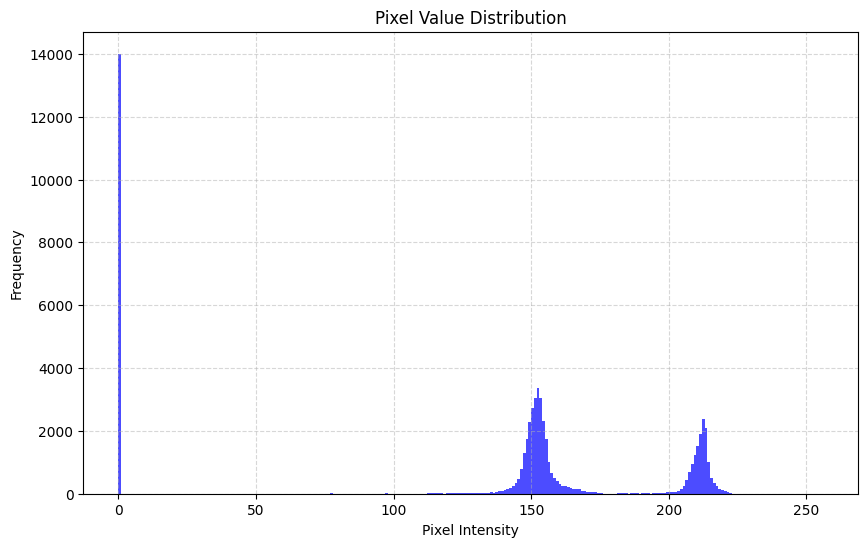

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have your image data in a numpy array called 'image_data'
# For a single image:
plt.figure(figsize=(10, 6))
plt.hist(sample_img.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Data Splitting

In [20]:
import os
import shutil
from pathlib import Path
import random
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [21]:
RAW_DATA_DIR = 'malaria_data/cell_images'
OUTPUT_DIR = 'malaria_ds/split_dataset'

PARASITIZED_DIR = os.path.join(RAW_DATA_DIR, 'Parasitized')
UNINFECTED_DIR = os.path.join(RAW_DATA_DIR, 'Uninfected')

# Output directories
TRAIN_DIR = os.path.join(OUTPUT_DIR, 'train')
VAL_DIR = os.path.join(OUTPUT_DIR, 'validation')
TEST_DIR = os.path.join(OUTPUT_DIR, 'test')

# Ensure output directories exist
os.makedirs(PARASITIZED_DIR, exist_ok=True)
os.makedirs(UNINFECTED_DIR, exist_ok=True)

print("Paths defined.")

Paths defined.


In [22]:
def split_class_files(class_dir, train_dir, val_dir, test_dir):
    all_files = list(Path(class_dir).glob('*.*'))
    train_files, test_files = train_test_split(all_files, test_size=0.1, random_state=42)
    train_files, val_files = train_test_split(train_files, test_size=0.1 / (1 - 0.1), random_state=42)

    for f in train_files:
        shutil.copy(f, train_dir)
    for f in val_files:
        shutil.copy(f, val_dir)
    for f in test_files:
        shutil.copy(f, test_dir)

    return len(all_files)

def create_split_folders():
    class_names = ['Parasitized', 'Uninfected']
    for folder in ['train', 'validation', 'test']:
        for cls in class_names:
            os.makedirs(os.path.join(OUTPUT_DIR, folder, cls), exist_ok=True)

    print("Splitting Parasitized Images:")
    total_parasitized = split_class_files(
        os.path.join(RAW_DATA_DIR, 'Parasitized'),
        os.path.join(OUTPUT_DIR, 'train', 'Parasitized'),
        os.path.join(OUTPUT_DIR, 'validation', 'Parasitized'),
        os.path.join(OUTPUT_DIR, 'test', 'Parasitized')
    )

    print("\nSplitting Uninfected Images:")
    total_uninfected = split_class_files(
        os.path.join(RAW_DATA_DIR, 'Uninfected'),
        os.path.join(OUTPUT_DIR, 'train', 'Uninfected'),
        os.path.join(OUTPUT_DIR, 'validation', 'Uninfected'),
        os.path.join(OUTPUT_DIR, 'test', 'Uninfected')
    )

    print(f"\nTotal Parasitized: {total_parasitized}, Uninfected: {total_uninfected}")
    print("Dataset split completed.")

## Data Aug and transforms

In [23]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Custom class_to_idx mapping to fix label order
class_to_idx = {'Uninfected': 0, 'Parasitized': 1}
idx_to_class = {v: k for k, v in class_to_idx.items()}

# Define transforms
train_transforms = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
])

val_test_transforms = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

# Custom Dataset Class to enforce class_to_idx
class CustomImageFolder(datasets.ImageFolder):
    def __init__(self, root, transform, class_to_idx_override=None):
        super().__init__(root=root, transform=transform)
        if class_to_idx_override:
            self.class_to_idx = class_to_idx_override
            self.samples = [
                (path, class_to_idx[cls]) 
                for path, cls_idx in self.samples 
                for cls in [self.classes[cls_idx]] 
                if cls in class_to_idx_override
            ]
            self.classes = list(class_to_idx_override.keys())



In [24]:
def get_dataloaders():
    # Create datasets
    train_dataset = CustomImageFolder(root=os.path.join(OUTPUT_DIR, 'train'), transform=train_transforms, class_to_idx_override=class_to_idx)
    val_dataset = CustomImageFolder(root=os.path.join(OUTPUT_DIR, 'validation'), transform=val_test_transforms, class_to_idx_override=class_to_idx)
    test_dataset = CustomImageFolder(root=os.path.join(OUTPUT_DIR, 'test'), transform=val_test_transforms, class_to_idx_override=class_to_idx)
    
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
    
    print(f"Train: {len(train_dataset)}, Val: {len(val_dataset)}, Test: {len(test_dataset)}")
    print("Class Mapping:", train_dataset.class_to_idx)

    return train_loader, val_loader, test_loader, train_dataset, val_dataset, test_dataset

In [26]:
def show_batch_sample(loader, dataset):
    images, labels = next(iter(loader))
    plt.figure(figsize=(12, 6))
    for i in range(min(6, BATCH_SIZE)):
        img = images[i].numpy().transpose((1, 2, 0))
        img = np.clip(img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406]), 0, 1)
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(idx_to_class[labels[i].item()])
        plt.axis("off")
    plt.suptitle("Sample Batch from DataLoader")
    plt.show()

Splitting Parasitized Images:

Splitting Uninfected Images:

Total Parasitized: 13780, Uninfected: 13780
Dataset split completed.
Train: 22047, Val: 2755, Test: 2756
Class Mapping: {'Uninfected': 0, 'Parasitized': 1}


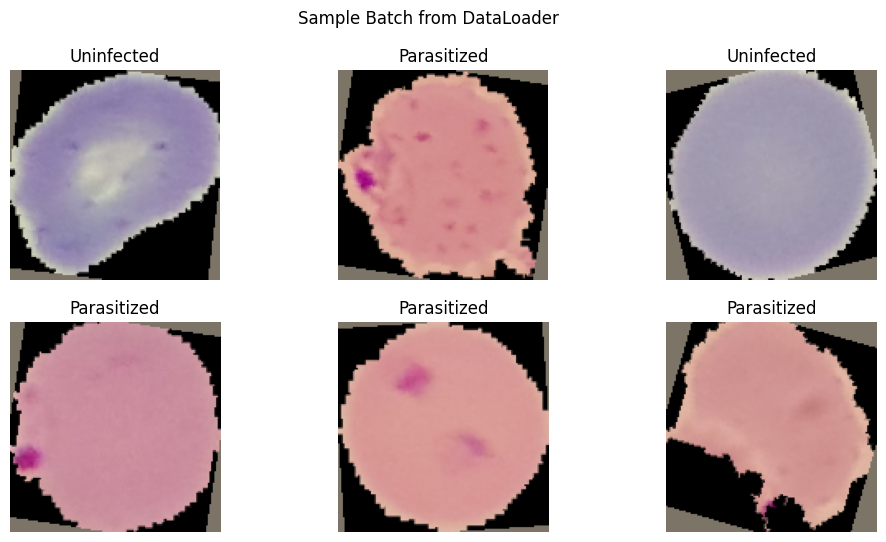

In [32]:
create_split_folders()
train_loader, val_loader, test_loader, train_dataset, val_dataset, test_dataset = get_dataloaders()
show_batch_sample(train_loader, train_dataset)

In [34]:
print(train_dataset)

Dataset CustomImageFolder
    Number of datapoints: 22047
    Root location: malaria_ds/split_dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
               RandomRotation(degrees=[-20.0, 20.0], interpolation=nearest, expand=False, fill=0)
               RandomHorizontalFlip(p=0.5)
           )
